
# PopScope: A Global Lens on Population Trends

*Image source: Scientific American*
[Global Population Growth Is Slowing Down. Here's One Reason Why](https://www.scientificamerican.com/article/global-population-growth-is-slowing-down-heres-one-reason-why/)  


---
<img src="https://studyfinds.org/wp-content/uploads/2023/03/World-population-surrounding-the-Earth-scaled.jpeg" alt="Celebrity Event Photo" width="600"/>

## Introduction

Population is more than just a number — it’s a reflection of how humanity grows, migrates, and evolves across generations. From bustling cities to remote villages, every data point in this notebook represents lives lived, communities formed, and futures shaped.

In this notebook, we explore global population trends using World Bank data. We aim to understand which regions are expanding rapidly, which are stabilizing, and what these patterns reveal about our shared trajectory. By grouping countries by region and income level, we uncover the forces behind demographic shifts and visualize how the world has changed — and continues to change — over time.

This is not just an exercise in data analysis. It’s a journey through the human story, told through numbers, graphs, and insights.

---


# PopScope: A Global Lens on Population Trends

This notebook explores global population growth patterns using World Bank data. We investigate regional growth, income-based comparisons, and emerging demographic trends from 1960 to 2022.

**Data Files Used:**
- `API_SP.POP.TOTL_DS.csv` — Total population data
- `Meta_country.csv` — Metadata on country regions and income groups


In [ ]:
# all import Statements 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Data's
# Load population data and skip metadata rows
pop_df = pd.read_csv("API_SP.POP.TOTL_DS.csv", skiprows=4)

# Load country metadata
meta_country = pd.read_csv("Meta_country.csv")

# Merge datasets on 'Country Code'
merged_df = pop_df.merge(meta_country, on="Country Code")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
merged_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2021,2022,2023,2024,Unnamed: 69,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107700.0,107310.0,107359.0,107624.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,713090928.0,731821393.0,750503764.0,769294618.0,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,40000412.0,40578842.0,41454761.0,42647492.0,NaN,"Middle East, North Africa, Afghanistan & Pakistan",Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,485920997.0,497387180.0,509398589.0,521764076.0,NaN,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,34532429.0,35635029.0,36749906.0,37885849.0,NaN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    265 non-null    object 
 1   Country Code    265 non-null    object 
 2   Indicator Name  265 non-null    object 
 3   Indicator Code  265 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [5]:
merged_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69,Unnamed: 5
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,0.0,0.0
mean,1.154023e+08,1.170070e+08,1.191678e+08,1.218381e+08,1.245322e+08,1.272581e+08,1.301037e+08,1.329570e+08,1.358851e+08,1.389115e+08,...,3.078574e+08,3.116049e+08,3.152801e+08,3.187967e+08,3.219557e+08,3.251253e+08,3.284356e+08,3.318869e+08,NaN,NaN
std,3.616526e+08,3.661347e+08,3.727681e+08,3.813687e+08,3.900162e+08,3.987697e+08,4.079989e+08,4.172145e+08,4.266937e+08,4.365313e+08,...,9.557617e+08,9.664403e+08,9.768047e+08,9.866025e+08,9.952966e+08,1.003734e+09,1.012519e+09,1.021734e+09,NaN,NaN
min,2.715000e+03,2.970000e+03,3.264000e+03,3.584000e+03,3.922000e+03,4.282000e+03,4.664000e+03,5.071000e+03,5.500000e+03,5.631000e+03,...,1.086900e+04,1.075100e+04,1.058100e+04,1.039900e+04,1.019400e+04,9.992000e+03,9.816000e+03,9.646000e+03,NaN,NaN
25%,5.152028e+05,5.255230e+05,5.363018e+05,5.475875e+05,5.593638e+05,5.675750e+05,5.711695e+05,5.779525e+05,5.825170e+05,5.861185e+05,...,1.791019e+06,1.797086e+06,1.788891e+06,1.790151e+06,1.786079e+06,1.803545e+06,1.827816e+06,1.792179e+06,NaN,NaN
50%,3.659633e+06,3.747132e+06,3.831900e+06,3.919710e+06,4.010150e+06,4.102976e+06,4.198738e+06,4.297792e+06,4.396290e+06,4.503420e+06,...,1.025915e+07,1.028382e+07,1.042338e+07,1.069786e+07,1.050577e+07,1.048694e+07,1.064485e+07,1.087698e+07,NaN,NaN
75%,2.686293e+07,2.761326e+07,2.837302e+07,2.915448e+07,2.995223e+07,3.075921e+07,3.147516e+07,3.203946e+07,3.247057e+07,3.277149e+07,...,6.000225e+07,6.014866e+07,5.972908e+07,6.097280e+07,6.283041e+07,6.471182e+07,6.661761e+07,6.851670e+07,NaN,NaN
max,3.021513e+09,3.062768e+09,3.117372e+09,3.184063e+09,3.251253e+09,3.318998e+09,3.389087e+09,3.459015e+09,3.530704e+09,3.604816e+09,...,7.614749e+09,7.697492e+09,7.778304e+09,7.855075e+09,7.920862e+09,7.990400e+09,8.064977e+09,8.142056e+09,NaN,NaN


In [6]:
merged_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69', 'Region', 'IncomeGroup', 'SpecialNotes',
       'TableName', 'Unnamed: 5'],
      dtype='object')

## Step 2: Reshape the Data

We convert the wide format (year columns) into a long format for time-series analysis. Then filter years between 1960 and 2022.


In [ ]:
# Melt the dataframe
long_df = merged_df.melt(
    id_vars=["Country Name", "Country Code", "Region", "IncomeGroup"],  # Use actual column name 'IncomeGroup'
    var_name="Year",
    value_name="Population"
)

# Convert year to numeric and filter range
long_df["Year"] = pd.to_numeric(long_df["Year"], errors="coerce")
long_df = long_df[(long_df["Year"] >= 1960) & (long_df["Year"] <= 2022)]

# Drop rows with missing Population values
long_df = long_df.dropna(subset=["Population"])

long_df.head()

<IPython.core.display.Javascript object>

,Country Name,Country Code,Region,IncomeGroup,Year,Population
530,Aruba,ABW,Latin America & Caribbean,High income,1960.0,54922.0
531,Africa Eastern and Southern,AFE,NaN,NaN,1960.0,130075728.0
532,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1960.0,9035043.0
533,Africa Western and Central,AFW,NaN,NaN,1960.0,97630925.0
534,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960.0,5231654.0


## Step 3: Metadata Enrichment

Categorize countries by income groups and regions for comparative analysis.


In [ ]:
# Drop missing population entries
long_df = long_df.dropna(subset=["Population"])

# Define custom developpment categories based on income levels
income_map = {
    "Low income": "Developing",
    "Lower middle income": "Developing",
    "Upper middle income": "Emerging",
    "High income": "Developed"
}

# Apply mapping to corect column name 'IncomeGroup'
long_df["Development Group"] = long_df["IncomeGroup"].map(income_map)


In [13]:
print(long_df["Development Group"].value_counts())


Development Group
Developed     5418
Developing    4695
Emerging      3402
Name: count, dtype: int64


## Step 4: Exploratory Data Analysis (EDA)

We explore overall trends, regional breakdowns, and the top 10 countries by population.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

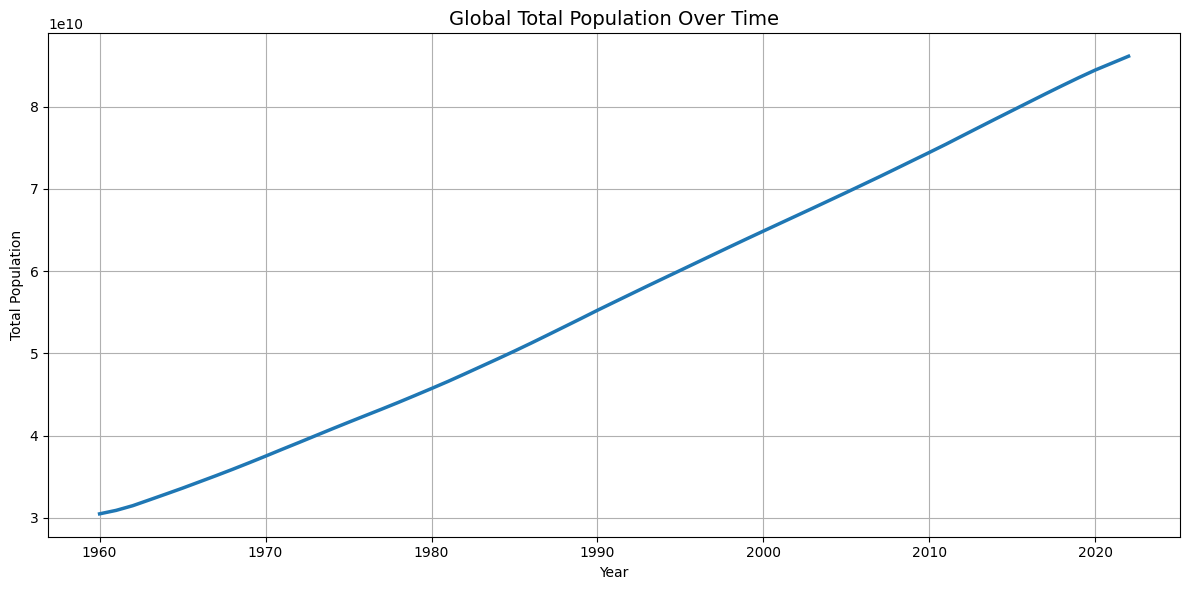

In [14]:
# Global total population by year
global_pop = long_df.groupby("Year", as_index=False)["Population"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_pop, x="Year", y="Population", linewidth=2.5)
plt.title("Global Total Population Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#If you have issue try to restart the kernel and run all cells again
#check this line to see the unique years in the dataset
# long_df['Year'].unique()
# long_df
# Convert Population to numeric (safe conversion)
long_df["Population"] = pd.to_numeric(long_df["Population"], errors="coerce")

<IPython.core.display.Javascript object>

In [ ]:
# Latest year
latest_year = long_df["Year"].max()

# Group by Country
top_countries = (
    long_df[long_df["Year"] == latest_year]
    .groupby("Country Name", as_index=False)["Population"]
    .sum()
    .nlargest(10, "Population")
)


In [27]:
print(top_countries.isnull().sum())


Country Name    0
Population      0
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\A\AppData\Local\Temp\ipykernel_14752\214346647.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Country Name", y="Population", palette="viridis")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

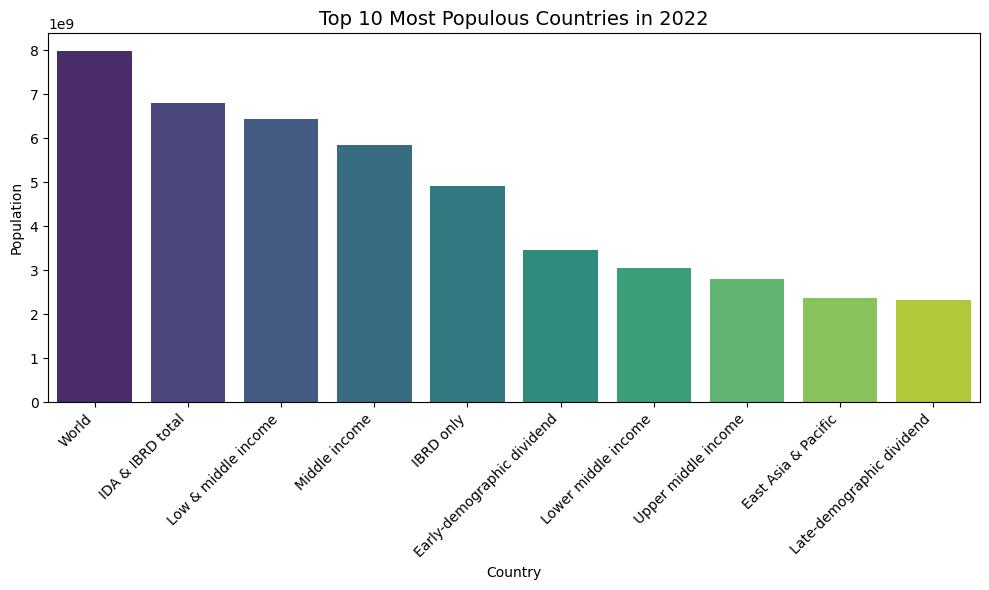

In [28]:
# Get the latest year from dataset
latest_year = long_df["Year"].max()

# Aggregate population by country for that year
top_countries = (
    long_df[long_df["Year"] == latest_year]
    .groupby("Country Name", as_index=False)["Population"]
    .sum()
    .nlargest(10, "Population")
)

# Visualize the top 10 most populous countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x="Country Name", y="Population", palette="viridis")
plt.title(f"Top 10 Most Populous Countries in {int(latest_year)}", fontsize=14)
plt.ylabel("Population")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [32]:
long_df['Year'].unique()


array([1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022.])

## Step 5: Regional Comparison

Visualize regional population evolution to identify growth zones.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

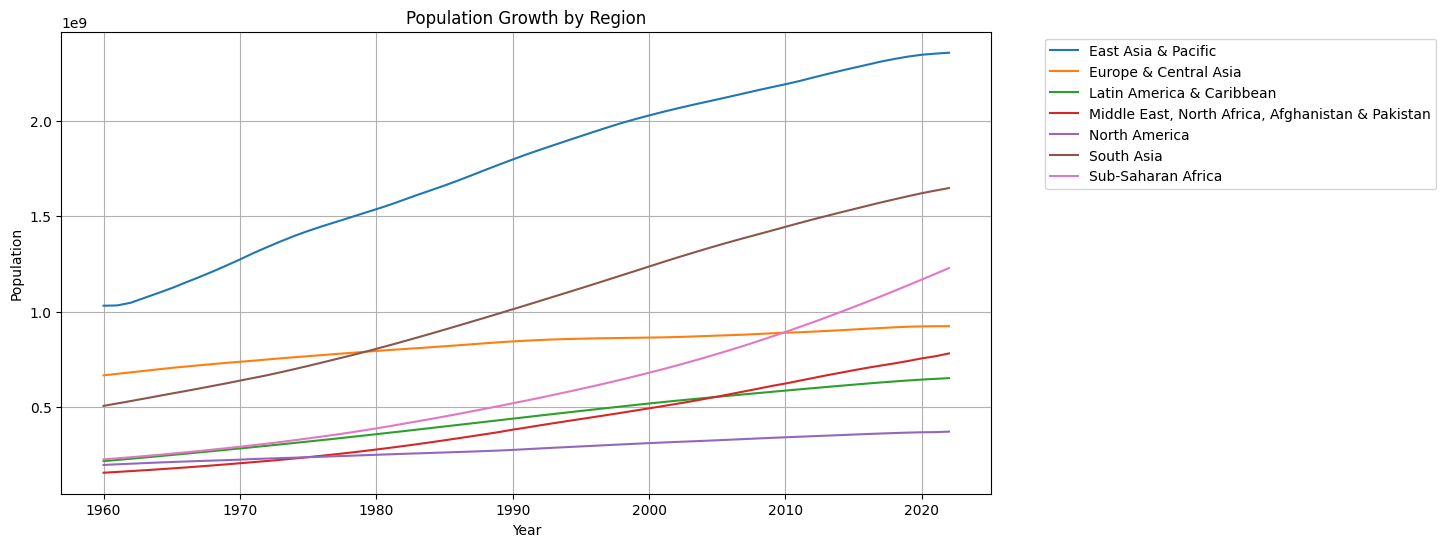

In [29]:
region_pop = long_df.groupby(["Region", "Year"])["Population"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=region_pop, x="Year", y="Population", hue="Region")
plt.title("Population Growth by Region")
plt.ylabel("Population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Step 6: Growth Rate Analysis

We compute year-over-year growth rates and rank countries by average annual increase.


In [30]:
# Pivot for growth calculation
pivot_df = long_df.pivot_table(index=["Country Name", "Country Code"], columns="Year", values="Population")
growth_df = pivot_df.pct_change(axis=1) * 100

# Compute mean growth across years
avg_growth = growth_df.mean(axis=1).sort_values(ascending=False)

# Top and bottom growth countries
print("Top 10 by Avg. Annual Growth:")
print(avg_growth.head(10))

print("\nBottom 10 by Avg. Annual Growth:")
print(avg_growth.tail(10))


Top 10 by Avg. Annual Growth:
Country Name               Country Code
United Arab Emirates       ARE             7.335655
Qatar                      QAT             7.307731
Kuwait                     KWT             4.625331
Sint Maarten (Dutch part)  SXM             4.587188
Djibouti                   DJI             4.290942
Saudi Arabia               SAU             4.267799
Jordan                     JOR             4.267105
Bahrain                    BHR             3.671363
Oman                       OMN             3.624807
Andorra                    AND             3.539243
dtype: float64

Bottom 10 by Avg. Annual Growth:
Country Name            Country Code
Georgia                 GEO             0.036733
Lithuania               LTU             0.035642
Serbia                  SRB             0.009575
Bosnia and Herzegovina  BIH            -0.020211
Ukraine                 UKR            -0.061577
Hungary                 HUN            -0.061727
Croatia                 HRV   

C:\Users\A\AppData\Local\Temp\ipykernel_14752\3643062513.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_df = pivot_df.pct_change(axis=1) * 100


## Step 7: Interactive Visualization (Optional)

Use Plotly for hoverable, filterable, and animated graphs.


In [31]:
import plotly.express as px

fig = px.line(global_pop, x="Year", y="Population", title="Global Population Trend (Interactive)")
fig.update_traces(line=dict(color='royalblue'))
fig.show()


## Step 8: Insights & Observations

- Asia and Africa are dominant growth regions.
- High-income regions show signs of population plateauing.
- Growth patterns are strongly tied to development and resource access.

This notebook lays the foundation for deeper analysis in future modules of **WorldGraphIQ**.


## Global Population Over Time (1960–2022)

Global population has grown exponentially from under 3 billion to over 8 billion. This surge reflects post-war improvements in healthcare, education, and living standards. After 2010, growth begins to taper, marking the start of demographic transitions in several regions.

Key takeaway: Worldwide demographic expansion is slowing — aging and reduced fertility are reshaping future population curves.


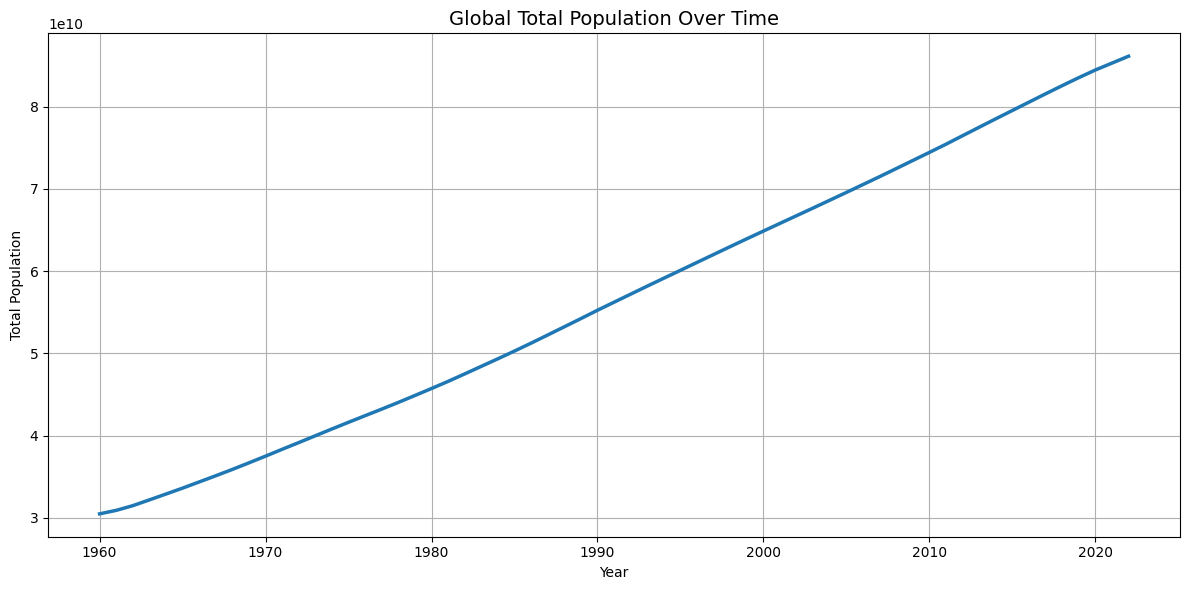
---


## Global Population Leaders: India, China, and the U.S.

India, China, and the United States collectively represent over 40% of the world’s population. Their demographic weight shapes global economics, migration, and development priorities.

<img src="https://thenationalbulletin.in/assets/media/post/52213612_images_-_2022-08-27T232852.286.jpeg" alt="USA and China flags on world map" width="600"/>

---

## Population Distribution by Metadata Groups

Income-level and demographic classifications reveal stark contrasts in population spread. Lower-middle and upper-middle income groups dominate, while developed nations contribute less to total count.

Key takeaway: Demographic dividends favor developing regions with youthful populations — creating both opportunity and pressure for inclusive growth.

<img src="https://www.visualcapitalist.com/wp-content/uploads/2024/03/PopGrowth_Share-1000x600.jpg" alt="World split into regions with the same population as the United States" width="600"/>



## Annual Growth Leaders and Laggards

High-growth countries (e.g., UAE, Qatar) reflect migration and urban expansion. In contrast, Eastern Europe faces demographic shrinkage from emigration and aging.

Key takeaway: Rapid growth doesn’t always mean scale — and population decline demands targeted policy response to avoid long-term socio-economic strain.


## PopScope: Macro Trends with Micro Meaning

This notebook bridges global trends with granular country-level narratives. Enriching analysis with region and development group metadata unlocks meaningful insights for policy and planning.

Key takeaway: PopScope transforms raw data into actionable understanding — setting the stage for modeling, forecasting, and decision-making.


## Author Information

**Name**: Nitish M.  
**Role**: Undergraduate Student – Data Science  
